### 主成分分析について
Pythonにおける主成分分析の実装のついてのメモ  
主成分分析は、多変量解析および機械学習の手法で、元の特徴量の線形結合により別の特徴量(主成分)を作ることから次元削減などで使われる。  
多変量解析においては、アンケートを解析するときによく用いられる手法。  
数学的には、元の項目の線形結合で表現される新たな変数(主成分)の分散が最大になるように因子負荷量(係数)を決めるというもの。  
結果的にそれは分散共分散行列の固有値問題となることは覚えておくこと。  
主成分は固有値の数だけ存在し、値が大きい順に、対応する固有ベクトルが第一主成分、第二主成分・・・となる。  
一般的には標準化したデータに対して行うが、sklearnのPCAではデフォルトで標準化したりはされていない様子。

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np

## Irisのデータを使って、主成分分析の実装をしてみる

In [2]:
dataset = datasets.load_iris()
dataset
#元の特徴量は4次元

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

各次元の寄与率: [0.92461621 0.05301557]
累積寄与率: 0.9776317750248034


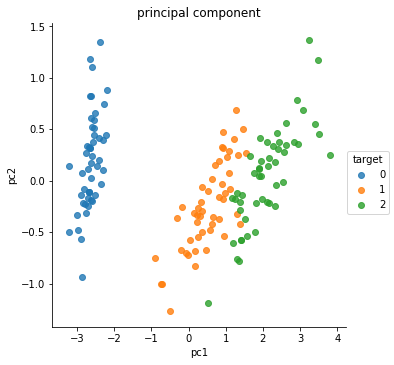

In [3]:
#上記のように、sklearnのdatasetsは辞書形式になっていて、データ部はkey=data/被説明変数=targetに格納されている。
#targetについては、0=setosa, 1=versicolor, 3=virginicaとなっている。

features = dataset["data"]
targets = dataset["target"]

# 主成分分析
pca = PCA(n_components=2)
pca.fit(features)

# もとのデータを主成分に変換する
transformed = pca.fit_transform(features)
trans_data = pd.DataFrame(transformed,columns=["pc1","pc2"])
trans_data["target"] = dataset["target"]

# 主成分をプロットする(jointplotを使いたいところだが、hueが使えないのでlmplotで代用)
sns.lmplot(x="pc1",y="pc2",hue="target",data=trans_data,fit_reg=False)
plt.title("principal component")

# 主成分の寄与率を出力する
print("各次元の寄与率:",pca.explained_variance_ratio_)
print("累積寄与率:",sum(pca.explained_variance_ratio_))

In [4]:
#PCAによって作成された平均と、分散共分散行列
print(pca.mean_)
print(pca.get_covariance())

[5.84333333 3.054      3.75866667 1.19866667]
[[ 0.67919741 -0.03258618  1.27066452  0.5321852 ]
 [-0.03258618  0.18113034 -0.31863564 -0.13363564]
 [ 1.27066452 -0.31863564  3.11934547  1.28541527]
 [ 0.5321852  -0.13363564  1.28541527  0.58961806]]


In [5]:
iris = pd.DataFrame(dataset["data"],columns=["x1","x2","x3","x4"])
iris["target"]=dataset["target"]

In [6]:
#元のデータの平均と分散
#これを見る限り、PCAはデフォルトで標準化などはしていない
#主成分分析は一般的に、標準化したあとのデータを用いる
print(iris.mean())
print(iris.var(ddof=False))

x1        5.843333
x2        3.054000
x3        3.758667
x4        1.198667
target    1.000000
dtype: float64
x1        0.681122
x2        0.186751
x3        3.092425
x4        0.578532
target    0.666667
dtype: float64


In [7]:
#標準化する
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std = scaler.fit_transform(iris.drop("target",axis=1))
std_data=pd.DataFrame(std)
print(std_data.mean())
print(std_data.var())
#浮動小数点により、厳密な0にはならないが、ちゃんと標準化できている。

0   -1.690315e-15
1   -1.637024e-15
2   -1.482518e-15
3   -1.623146e-15
dtype: float64
0    1.006711
1    1.006711
2    1.006711
3    1.006711
dtype: float64


各次元の寄与率: [0.72770452 0.23030523]
累積寄与率: 0.9580097536148198


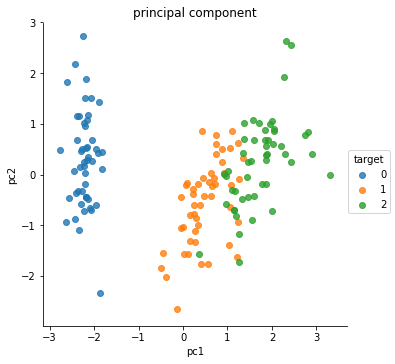

In [8]:
# 主成分分析
pca2= PCA(n_components=2)
pca2.fit(std_data)

# もとのデータを主成分に変換する
transformed2 = pca.fit_transform(std_data)
trans_data_std = pd.DataFrame(transformed2,columns=["pc1","pc2"])
trans_data_std["target"] = iris["target"]

# 主成分をプロットする
sns.lmplot(x="pc1",y="pc2",hue="target",data=trans_data_std,fit_reg=False)
plt.title("principal component")

# 主成分の寄与率を出力する
print("各次元の寄与率:",pca2.explained_variance_ratio_)
print("累積寄与率:",sum(pca2.explained_variance_ratio_))

Text(0.5,1,'principal component standardize')

<Figure size 720x1440 with 0 Axes>

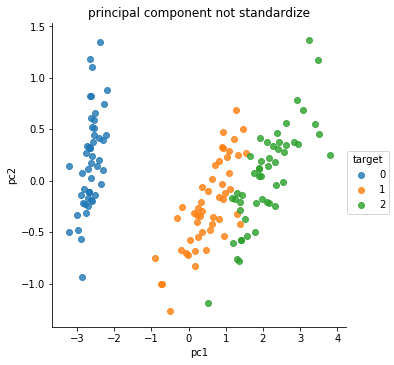

<Figure size 720x1440 with 0 Axes>

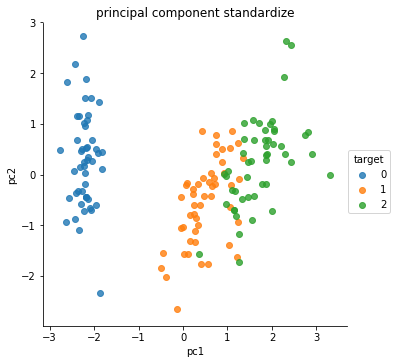

In [9]:
# 標準化していない場合と、標準化した場合の比較(上記二つのグラフを並べただけ)

plt.figure(figsize=(10, 20))
sns.lmplot(x="pc1",y="pc2",hue="target",data=trans_data,fit_reg=False)
plt.title("principal component not standardize")

plt.figure(figsize=(10, 20))
sns.lmplot(x="pc1",y="pc2",hue="target",data=trans_data_std,fit_reg=False)
plt.title("principal component standardize")

In [10]:
#第一主成分と第二主成分で分類をするという観点では、このデータに関しては標準化はしないほうがうまくいきそう。
#しかし、各主成分の寄与率を見ると、標準化したほうが第一主成分の寄与率は上がっている。

## sklearnのPCAによる結果と固有ベクトルが同じ結果となっていることを確認する
上の標準化したデータと、相関行列の固有ベクトルの結果を比較し、主成分分析の理論的な結果を確認する。

In [11]:
#標準化したデータにおける因子負荷量(係数)
#n_components=2としたので、第一主成分と第二主成分の二次元となる
print(pca2.components_)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [12]:
#主成分分析は、数学的には分散共分散行列の固有値問題となる
#今回は標準化したデータなので分散共分散行列=相関行列
#第一主成分と第二主成分の因子負荷量は、固有値を大きい順に並べたときの対応する固有ベクトルとなる
#このことを確認してみる

#相関行列の作成
cor = iris.drop("target",axis=1).corr()

#相関行列の固有値、固有ベクトルを求める
eigen=np.linalg.eig(cor)

eigen_vector=pd.DataFrame(eigen[1],columns=eigen[0])
print("固有値と固有ベクトル(列名が固有値)")
print(eigen_vector)
print("\n標準化データにおける、因子負荷量")
print(pca2.components_.T)

固有値と固有ベクトル(列名が固有値)
   2.910818  0.921221  0.147353  0.020608
0  0.522372 -0.372318 -0.721017  0.261996
1 -0.263355 -0.925556  0.242033 -0.124135
2  0.581254 -0.021095  0.140892 -0.801154
3  0.565611 -0.065416  0.633801  0.523546

標準化データにおける、因子負荷量
[[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]


### 結論
上の結果を見ればわかるように、固有値の大きいものから2つ選び、それに対応する固有ベクトルが因子負荷量となっている。  
第二主成分における因子負荷量が、固有ベクトルと符号が逆になっていることに注目  
因子分析においては、因子負荷量の符号は正でも負でも良く、解釈の仕方が逆になるだけ  
例:味の良さ or 味の悪さ  
PCAの計算の過程によって固有ベクトルとは符号が逆になっているのだと思われる。